<a href="https://colab.research.google.com/github/ghazi-U1N/Kelompok-6-3A-Case-Study-3/blob/main/EDA_Studi_Kasus_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KELOMPOK 6**

**Ketua Kelompok: Ghazi Al Ghifari (NIM 11210940000001)**

**Anggota Kelompok:**

**1. Nursia (NIM 11210940000002)**

**2. Auliyatunnisa' Febrianingrum (NIM 11210940000010)**

**3. Adinda Anas Qolbu (NIM 11210940000011)**

**4. Deffin Purnama Noer (NIM 11210940000036)**

**5. Fanny Wahyu Aprilia (NIM 11210940000037)**

**6. Nadya Rifqah Khairani (NIM 11210940000041)**

# Data Understanding (DU):

Keterangan Varabel:
* Created_at: Tanggal dimana iklan rumah dibuat
* LT		: Luas Tanah properti yang ditawarkan
* LB		: Luas Bangunan properti yang ditawarkan
* KT		: Jumlah Kamar Tidur properti yang ditawarkan
* KM		: Jumlah Kamar Mandi properti yang ditawarkan
* Garasi	: Jumlah Kapasitas Garasi di properti yang ditawarkan
* Carport	: Kapasitas Carport di properti yang ditawarkan
* Lokasi	: Detail lokasi properti yang ditawarkan
* Sertifikat: Jenis sertifikat properti yang ditawarkan
* Listrik	: Daya listrik dari properti yang ditawarkan
* Hadap		: Keterangan property yang ditawarkan menghadap ke arah mana
* Harga 	: Harga property yang ditawarkan dalam Rupiah
* URL		: Alamat tautan (link) property yang ditawarkan.
* Deskripsi	: Deskripsi iklan property yang ditawarkan. 

In [1]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
plt.style.use('bmh'); sns.set()

In [2]:
try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/ghazi-U1N/Kelompok-6-3A-Case-Study-3/main/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/ghazi-U1N/Kelompok-6-3A-Case-Study-3/main/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/ghazi-U1N/Kelompok-6-3A-Case-Study-3/main/data/tangerang.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfD.shape, dfT.shape

--2022-10-25 02:59:57--  https://raw.githubusercontent.com/ghazi-U1N/Kelompok-6-3A-Case-Study-3/main/data/jakarta.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65115 (64K) [text/plain]
Saving to: ‘data/jakarta.csv’

jakarta.csv         100%[===================>]  63.59K  --.-KB/s    in 0s      

2022-10-25 02:59:57 (166 MB/s) - ‘data/jakarta.csv’ saved [65115/65115]

--2022-10-25 02:59:57--  https://raw.githubusercontent.com/ghazi-U1N/Kelompok-6-3A-Case-Study-3/main/data/depok.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Leng

((1024, 26), (998, 26), (128, 26))

In [3]:
#dfD adalah data di kota Depok
#Menampilkan data dari atas, bisa diisi seberapa banyak data ingin ditampilkan, default menampilkan 5 data pertama
dfD.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Menampilkan data dari bawah, bisa diisi seberapa banyak data ingin ditampilkan, default menampilkan 5 data pterakhir
dfD.tail()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dfD.isna().sum()
#Banyaknya data yang kosong

created_at     879
LT             878
LB             880
KT             880
KM             880
garasi         973
carport        904
lokasi         880
sertifikat     880
listrik        895
hadap          936
harga          880
URL            880
deskripsi      880
Unnamed: 14    998
Unnamed: 15    998
Unnamed: 16    998
Unnamed: 17    998
Unnamed: 18    998
Unnamed: 19    998
Unnamed: 20    998
Unnamed: 21    998
Unnamed: 22    998
Unnamed: 23    998
Unnamed: 24    998
Unnamed: 25    998
dtype: int64

In [6]:
x = dfD.dropna(axis = 0, how = "all")
x

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,4-12-2021,40,40.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,4-12-2021,50,50.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,4-12-2021,100,15.0,3.0,3.0,1.0,1.0,Cinere,SHM,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,NOTE:,- lokasi yang kami gunakan hanya per kecamatan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
Depok = x.dropna(axis = 1, how = "all")
Depok

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,Selatan,2100.0,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Barat,250.0,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,NaN,250.0,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,Timur,350.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,4-12-2021,40,40.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Timur,195.0,https://www.rumah123.com/properti/depok/hos928...,rumah semi minimalis manis harga ekonomis di c...
116,4-12-2021,50,50.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Selatan,185.0,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...
117,4-12-2021,100,15.0,3.0,3.0,1.0,1.0,Cinere,SHM,3500.0,NaN,1750.0,https://www.rumah123.com/properti/depok/hos928...,Dijual cepat rumah bagus siap huni
120,NOTE:,- lokasi yang kami gunakan hanya per kecamatan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
Depok.drop(Depok.tail(1).index,inplace=True)

In [9]:
Dpk = Depok.dropna()
Dpk
#Data depok yang sudah bersih

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
12,6-12-2021,60,45.0,2.0,1.0,1.0,1.0,Cipayung,SHM,1300.0,Utara,480.0,https://www.rumah123.com/properti/depok/hos928...,rumah dengan akses jalan raya
15,6-12-2021,57,40.0,2.0,1.0,1.0,1.0,Sawangan,SHM,1300.0,Utara,390.0,https://www.rumah123.com/properti/depok/hos928...,cluster di sawangan dengan cicilan rendah
22,5-12-2021,75,54.0,2.0,1.0,1.0,1.0,Cipayung,SHM,1300.0,Utara,450.0,https://www.rumah123.com/properti/depok/hos927...,Rumah Luas Murah Lokasi Cipayung Deok Dekat St...
24,5-12-2021,378,289.0,4.0,4.0,3.0,3.0,Sukmajaya,SHM,5500.0,Timur Laut,7000.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Mewah di Pesona Khayangan Mungil Dekat U...
25,5-12-2021,400,226.0,5.0,4.0,2.0,1.0,Cinere,SHM,2200.0,Selatan,3600.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Mewah Full Furnish Marmer di Megapolitan...
32,5-12-2021,151,180.0,3.0,3.0,1.0,1.0,Pancoran Mas,SHM,2200.0,Selatan,3500.0,https://www.rumah123.com/properti/depok/hos928...,Rumah 2 Lantai di Pesona Kayangan Margonda Depok
40,5-12-2021,66,45.0,2.0,1.0,1.0,1.0,Sawangan,SHM,1300.0,Timur,465.0,https://www.rumah123.com/properti/depok/hos928...,"Rumah dijual Murah Promo tanpa dp,Angsuran Rin..."
46,5-12-2021,75,75.0,3.0,2.0,2.0,2.0,Pancoran Mas,SHM,2200.0,Timur,905.0,https://www.rumah123.com/properti/depok/hos928...,Rumah 2 lantai lokasi dalam Cluster dekat tol ...
76,5-12-2021,71,45.0,2.0,1.0,1.0,1.0,Sawangan,SHM,1300.0,Selatan,350.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok
99,4-12-2021,50,36.0,2.0,1.0,1.0,1.0,Sawangan,SHM,1300.0,Timur,235.0,https://www.rumah123.com/properti/depok/hos928...,Rumah paling murah di Depok


In [10]:
a = dfJ.dropna(axis = 0, how = "all")
a

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,22-11-2021,220.0,239.0,5.0,4.0,1.0,2.0,Jakarta Timur,PPJB,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,06-12-2021,70.0,57.0,3.0,2.0,NaN,2.0,Jakarta Timur,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,06-12-2021,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,06-12-2021,135.0,190.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM + IMB,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
Jakarta = a.dropna(axis = 1, how = "all")
Jakarta
#Data Jakarta yang sudah bersih

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,22-11-2021,220.0,239.0,5.0,4.0,1.0,2.0,Jakarta Timur,PPJB,3500.0,NaN,3.850000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Mewah siap huni 2 lantai 220m 10x22 type...
117,06-12-2021,70.0,57.0,3.0,2.0,NaN,2.0,Jakarta Timur,SHM,2200.0,NaN,8.800000e+08,https://www.rumah.com/listing-properti/dijual-...,Rumah Signature Location & Access :\r\n• 2 Men...
118,06-12-2021,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,Timur,4.300000e+09,https://www.rumah.com/listing-properti/dijual-...,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam..."
119,06-12-2021,135.0,190.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM + IMB,2200.0,Selatan,3.400000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...


In [12]:
Jkt = Jakarta.dropna()
Jkt

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
6,06-12-2021,424.0,1000.0,4.0,5.0,1.0,1.0,Jakarta Pusat,SHM,33000.0,Timur,4.950000e+10,https://www.rumah.com/listing-properti/dijual-...,"Rumah mewah berkonsep hotel bintang 5, interio..."
27,07-12-2021,225.0,425.0,5.0,4.0,1.0,2.0,Jakarta Selatan,SHM,3300.0,Utara,9.500000e+09,https://rumahdijual.com/kemang/8912284-kemang-...,- Full furnished \r\n- Dengak dengan Mcdonald ...
28,06-12-2021,290.0,460.0,7.0,5.0,2.0,2.0,Jakarta Selatan,SHM + IMB,3500.0,Barat,8.250000e+09,https://rumahdijual.com/tebet/1914317-dijual-r...,"Taman, gudang , air jetpump, toren air, pagar ..."
30,06-12-2021,243.0,529.0,6.0,6.0,4.0,2.0,Jakarta Selatan,SHM + IMB + PBB,11000.0,Utara,1.350000e+10,https://rumahdijual.com/kemang/8972515-rumah-l...,- Kolam renang pribadi\r\n- CCTV dan pos satpa...
37,01-12-2021,205.0,410.0,6.0,5.0,1.0,1.0,Jakarta Selatan,SHM + IMB,4500.0,Barat,5.500000e+09,https://rumahdijual.com/tebet/5247440-dijual-r...,"- Semi furnished ( wallpaper, kitchen set, was..."
38,18-11-2021,695.0,650.0,8.0,6.0,1.0,1.0,Jakarta Selatan,SHM,5500.0,Selatan,9.200000e+09,https://rumahdijual.com/tebet/9514888-rumah-cl...,"- Jumlah AC 8\r\n- Unfurnish, bangunan tahun 1..."
39,18-11-2021,135.0,216.0,5.0,4.0,1.0,1.0,Jakarta Selatan,SHM,3500.0,Utara,4.100000e+09,https://rumahdijual.com/tebet/9515260-rumah-ba...,- Rumah baru dan bebas banjir\r\n- Lingkunan a...
60,06-12-2021,90.0,200.0,3.0,3.0,1.0,2.0,Jakarta Barat,SHM,3500.0,timur,1.900000e+09,https://www.rumah.com/listing-properti/dijual-...,bebas banjir\r\n-one gate system\r\n-lingkunga...
61,15-11-2021,863.0,500.0,5.0,3.0,5.0,3.0,Jakarta Barat,SHM,3500.0,Timur Laut,8.630000e+09,https://www.rumah.com/listing-properti/dijual-...,"Dijual cepat rumah asri 1 lantai, halaman luas..."
70,06-12-2021,90.0,200.0,3.0,3.0,1.0,1.0,Jakarta Barat,SHM,3500.0,Timur,1.900000e+09,https://www.rumah.com/listing-properti/dijual-...,"bebas banjir, lingkungan aman"


In [13]:
t = dfT.dropna(axis = 0, how = "all")
t

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,12-08-2021,60.0,55.0,2.0,2.0,NaN,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,12-08-2021,66.0,70.0,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
Tangerang = t.dropna(axis = 1, how = "all")
Tangerang
#Data Tangerang yang sudah bersih

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,Selatan,500.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,NaN,480.0,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a..."
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,NaN,600.0,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ..."
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,NaN,4250.0,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,NaN,1700.0,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,12-08-2021,60.0,55.0,2.0,2.0,NaN,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,NaN,711.0,https://www.rumah123.com/properti/tangerang/ho...,"Lokasi sangat dekat dengan berbagai Akses,Ters..."
120,12-08-2021,66.0,70.0,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,NaN,850.0,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,Barat,1860.0,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,NaN,1800.0,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d..."


In [15]:
Tgr = Tangerang.dropna()
Tgr

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
7,12-06-2021,72.0,45.0,2.0,1.0,1.0,1.0,"SEPATAN, TANGERANG",SHM,1300.0,Selatan,148.0,https://www.rumah123.com/properti/tangerang/ho...,"Akses Bandara Soekarno-Hatta, Jalan Row 10 met..."
8,12-06-2021,151.0,120.0,2.0,2.0,1.0,1.0,"CIKUPA CITRA JAYA, TANGERANG",SHM,1300.0,Selatan,760.0,https://www.rumah123.com/properti/tangerang/ho...,Lokasi rumah sangat strategis dekat fasilitas ...
10,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"PONDOK JAGUNG, TANGERANG",SHM,2200.0,Tenggara,600.0,https://www.rumah123.com/properti/tangerang/ho...,Memiliki lokasi yang strategis yaitu 100 meter...
13,12-06-2021,72.0,40.0,2.0,1.0,1.0,1.0,"CIKUPA CITRA JAYA, TANGERANG",SHM,1300.0,Timur,500.0,https://www.rumah123.com/properti/tangerang/ho...,Keamanan 24 jam dan sangat strategis
16,12-06-2021,250.0,360.0,5.0,4.0,1.0,1.0,"BENDA, TANGERANG",SHM,4400.0,Timur,2900.0,https://www.rumah123.com/properti/tangerang/ho...,"Memiliki lantai granit, 1 gudang, Water heater..."
40,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"BSD CITY, TANGERANG",SHM,2200.0,Selatan,600.0,https://www.rumah123.com/properti/tangerang/ho...,BOSTON VILLAGE BSD- BINTARO\r\nAkses 100 Meter...
45,12-06-2021,320.0,225.0,3.0,3.0,1.0,1.0,"BSD THE ICON, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",4400.0,Barat Daya,5300.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah cluster, siap huni, bersih terawat, ling..."
54,12-06-2021,474.0,500.0,6.0,5.0,4.0,2.0,"BSD DE PARK, TANGERANG",SHM,23000.0,Utara,12500.0,https://www.rumah123.com/properti/tangerang/ho...,"LT 474, LB +/- 500 (full renovated), KT 6+2, K..."
55,12-06-2021,250.0,380.0,6.0,4.0,1.0,1.0,"BSD, TANGERANG",SHM,5500.0,Barat,5050.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah di kawasan BSD, Luas tanah : 250 m2, Lua..."
84,12-06-2021,144.0,117.0,3.0,3.0,1.0,1.0,"BANJAR WIJAYA, TANGERANG",SHM,2200.0,Utara,1950.0,https://www.rumah123.com/properti/tangerang/ho...,"Memiliki fasilitas keamanan, Masjid, Jogging T..."


In [16]:
Data = pd.concat([Tgr, Dpk, Jkt])
Data
#Penggabungan data dari 3 kota yaitu Jakarta, Depok, dan Tangerang

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
7,12-06-2021,72.0,45.0,2.0,1.0,1.0,1.0,"SEPATAN, TANGERANG",SHM,1300.0,Selatan,1.480000e+02,https://www.rumah123.com/properti/tangerang/ho...,"Akses Bandara Soekarno-Hatta, Jalan Row 10 met..."
8,12-06-2021,151.0,120.0,2.0,2.0,1.0,1.0,"CIKUPA CITRA JAYA, TANGERANG",SHM,1300.0,Selatan,7.600000e+02,https://www.rumah123.com/properti/tangerang/ho...,Lokasi rumah sangat strategis dekat fasilitas ...
10,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"PONDOK JAGUNG, TANGERANG",SHM,2200.0,Tenggara,6.000000e+02,https://www.rumah123.com/properti/tangerang/ho...,Memiliki lokasi yang strategis yaitu 100 meter...
13,12-06-2021,72.0,40.0,2.0,1.0,1.0,1.0,"CIKUPA CITRA JAYA, TANGERANG",SHM,1300.0,Timur,5.000000e+02,https://www.rumah123.com/properti/tangerang/ho...,Keamanan 24 jam dan sangat strategis
16,12-06-2021,250.0,360.0,5.0,4.0,1.0,1.0,"BENDA, TANGERANG",SHM,4400.0,Timur,2.900000e+03,https://www.rumah123.com/properti/tangerang/ho...,"Memiliki lantai granit, 1 gudang, Water heater..."
40,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"BSD CITY, TANGERANG",SHM,2200.0,Selatan,6.000000e+02,https://www.rumah123.com/properti/tangerang/ho...,BOSTON VILLAGE BSD- BINTARO\r\nAkses 100 Meter...
45,12-06-2021,320.0,225.0,3.0,3.0,1.0,1.0,"BSD THE ICON, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",4400.0,Barat Daya,5.300000e+03,https://www.rumah123.com/properti/tangerang/ho...,"Rumah cluster, siap huni, bersih terawat, ling..."
54,12-06-2021,474.0,500.0,6.0,5.0,4.0,2.0,"BSD DE PARK, TANGERANG",SHM,23000.0,Utara,1.250000e+04,https://www.rumah123.com/properti/tangerang/ho...,"LT 474, LB +/- 500 (full renovated), KT 6+2, K..."
55,12-06-2021,250.0,380.0,6.0,4.0,1.0,1.0,"BSD, TANGERANG",SHM,5500.0,Barat,5.050000e+03,https://www.rumah123.com/properti/tangerang/ho...,"Rumah di kawasan BSD, Luas tanah : 250 m2, Lua..."
84,12-06-2021,144.0,117.0,3.0,3.0,1.0,1.0,"BANJAR WIJAYA, TANGERANG",SHM,2200.0,Utara,1.950000e+03,https://www.rumah123.com/properti/tangerang/ho...,"Memiliki fasilitas keamanan, Masjid, Jogging T..."


In [17]:
Data2 = pd.concat([dfD, dfJ, dfT])
Data2

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


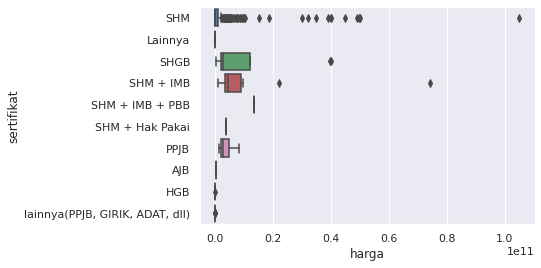

In [18]:
sns.boxplot(x="harga", y="sertifikat", data= Data2)

Maka, data yang merupakan outlier dengan kata lain jauh dari data-data yang lain telah dibuang sejumlah 7 dengan menggunakan metode IQR dataset

Text(0.5, 1.0, '7 Lokasi Rumah Dari Harga Termahal Sampai Termurah')

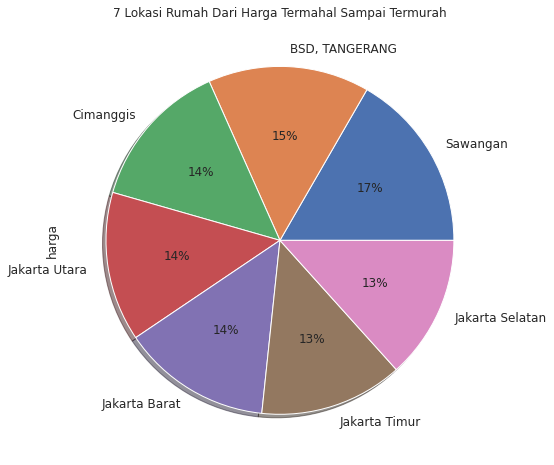

In [19]:
Seven_house = Data2.groupby(Data2['lokasi'])['harga'].count().sort_values(ascending = False).head(7)
plt.figure(figsize=(12,8))
plt.subplot()
Seven_house.plot.pie(autopct = '%1.f%%', shadow = True, fontsize = 12)
plt.title('7 Lokasi Rumah Dari Harga Termahal Sampai Termurah')
#No 3
#Rumah termahal berlokasi di Sawangan
#Rumah termurah berlokasi di Jakarta Barat dan Pancoran Mas

Berdasarkan hasil visualisasi dari diagram pie diperoleh bahwa di lokasi Sawangan memiliki harga rumah yang relatif mahal dengan presentase 17%. Lokasi ke-2 dengan harga rumah relatif mahal berada di BSD Tangerang dengan presentase 15%. Sedangkan di lokasi termurah berada di Jakarta Selatan dan Jakarta Timur dengan presentase 13%. Sehingga disarankan jika ingin membeli rumah dengan harga yang relatif murah dari kota Jakarta, Tangerang, dan Depok, dianjurkan untuk membeli di daerah Jakarta khususnya di daerah Jakarta Selatan dan Jakarta Timur. 

Text(0.5, 1.0, '7 Lokasi Rumah dengan luas tanah terluas dari kota Jakarta, Depok dan Tangerang')

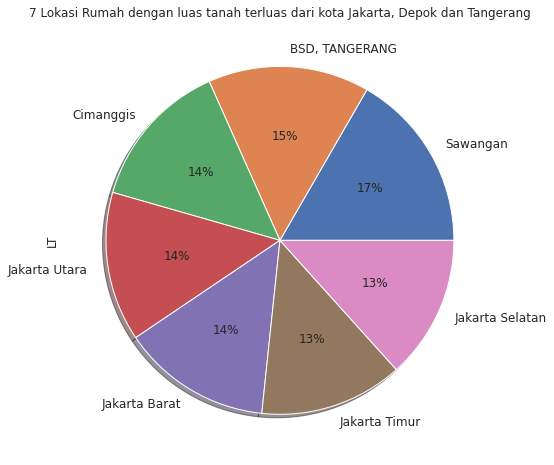

In [20]:
Seven_location = Data2.groupby(Data2['lokasi'])['LT'].count().sort_values(ascending = False).head(7)
plt.figure(figsize=(12,8))
plt.subplot()
Seven_location.plot.pie(autopct = '%1.f%%', shadow = True, fontsize = 12)
plt.title('7 Lokasi Rumah dengan luas tanah terluas dari kota Jakarta, Depok dan Tangerang')

Berdasarkan hasil visualisasi dari diagram pie di atas, diperoleh bahwa luas tanah di daerah Sawangan memiliki luas tanah terluas dengan presentase 17%. Sedangkan, di lokasi Jakarta Selatan dan Jakarta Timur memiliki luas tanah terkecil dengan presentase 13%. Sehingga disaranakn jika Anda ingin membeli rumah yang memiliki luas tanah lebih luas, dianjurkan untuk membeli di daerah Sawangan. Sebaliknya, jika ingin membeli rumah yang memiliki luas tanah lebih kecil, dianjurkan untuk membeli di daerah Jakarta Selatan dan Jakarta Timur. 

Berdasarkan dua interpretasi di atas, bisa kita simpulkan bahwa jika rumah memilki luas tanah yang luas maka harganya pun relatif mahal. Sebaliknya, jika rumah memiliki luas tanah yang kecil maka harganya pun relatif murah. Kesimpulannya, luas tanah mempengaruhi harga rumah.

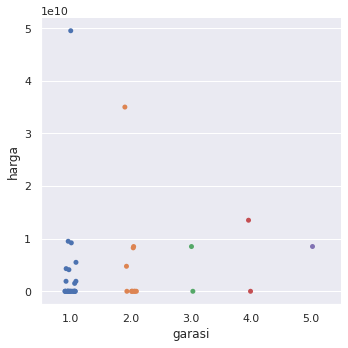

In [21]:
Catplox = sns.catplot(x="garasi", y="harga", data=Data)

Berdasarkan hasil v

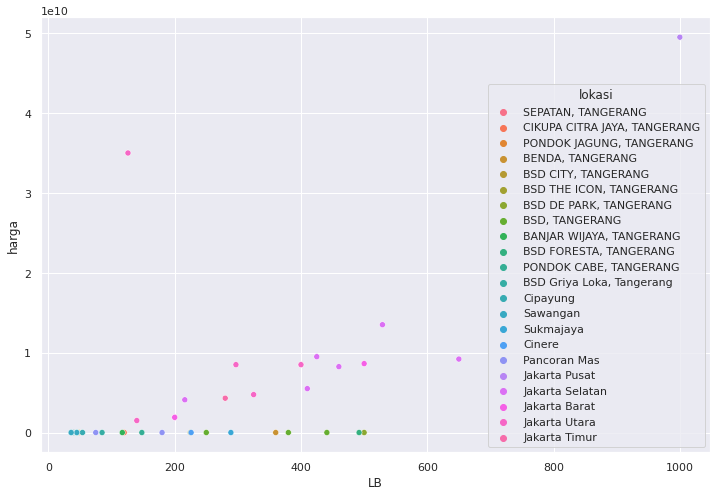

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

p = sns.scatterplot(x= Data['LB'], y= Data['harga'], hue = Data['lokasi'], ax=ax)

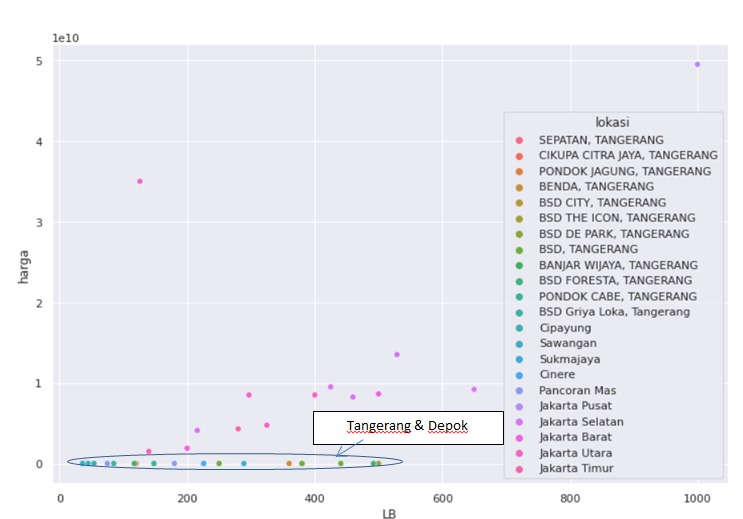

Pada visualisasi di atas dengan variabel Luas Bangunan, Harga, dan Lokasi, dapat dilihat bahwa bangunan di kota Depok dan Tangerang memiliki harga yang terjangkau dan pada beberapa daerah di kota Depok serta Tangerang juga menyediakan bangunan yang memiliki luas bangunan yang cukup luas dengan harga yang rendah. Sedangkan di kota Jakarta, harga bangunan cenderung mahal, namun sesuai dengan luas bangunan. Sehingga untuk di kota Jakarta, semakin luas sebuah bangunan, semakin tinggi pula harga bangunan tersebut.

Untuk para perusahaan maupun investor, meninjau dari segi harga dan luas bangunan, kami sarankan untuk membeli tanah serta bangunan di Tangerang dan Depok. Kemudian kami mengusulkan untuk merevitalisasi bangunan tersebut sehingga dapat dijual dengan harga yang lebih tinggi.

In [23]:
Data.corr()

,LB,KT,KM,garasi,carport,listrik,harga
LB,1.000000,0.726569,0.801178,0.357621,0.290231,0.760889,0.594680
KT,0.726569,1.000000,0.888921,0.392569,0.314169,0.350948,0.267884
KM,0.801178,0.888921,1.000000,0.391579,0.358621,0.529136,0.421511
garasi,0.357621,0.392569,0.391579,1.000000,0.779822,0.309083,0.124569
carport,0.290231,0.314169,0.358621,0.779822,1.000000,0.153833,0.139347
listrik,0.760889,0.350948,0.529136,0.309083,0.153833,1.000000,0.616390
harga,0.594680,0.267884,0.421511,0.124569,0.139347,0.616390,1.000000


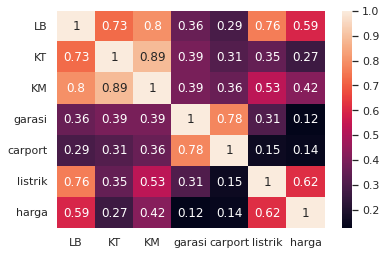

In [24]:
sns.heatmap(Data.corr(), annot = True)

In [25]:
CS = pd.crosstab(index = Data['garasi'], columns = Data['LT'])
CS

LT,60.0,72.0,90.0,98.0,135.0,144.0,151.0,162.0,170.0,180.0,...,863.0,151,378,400,50,57,60,66,71,75
garasi,,,,,,,,,,,,,,,,,,,,,
1.0,0,2,2,0,1,1,1,1,0,1,...,0,1,0,0,2,1,1,2,1,1
2.0,2,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [26]:
X = Data2[Data2["sertifikat"].isin(["SHM", "PBB"])]
X = X[X["harga"]<7000000]
X.groupby(["lokasi", "sertifikat"]).size().unstack()

sertifikat,SHM
lokasi,
"ALAM SUTERA, TANGERANG",2
"BANJAR WIJAYA, TANGERANG",2
"BENDA, TANGERANG",1
"BSD CITY, TANGERANG",16
"BSD DE PARK, TANGERANG",1
"BSD DELATINOS, TANGERANG",1
"BSD DUTA BINTARO, TANGERANG",1
"BSD FORESTA, TANGERANG",1
"BSD GRIYA LOKA, TANGERANG",1
